In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
df=pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [21]:
X=df.drop(columns=['Exited'])

In [23]:
y=df['Exited']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)


In [30]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [31]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [33]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,0,0,1
3850,680,34,3,143292.95,1,1,0,66526.01,0,0,1
4962,531,42,2,0.00,2,0,1,90537.47,0,0,0
3886,710,34,8,147833.30,2,0,1,1561.58,1,0,1
5437,543,30,6,73481.05,1,1,1,176692.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,0,1,0
162,800,49,7,108007.36,1,0,0,47125.11,0,0,0
7903,567,34,10,0.00,2,0,1,161571.79,0,1,1
2242,621,30,2,101014.08,2,1,1,165257.31,1,0,0


In [34]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [35]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [36]:
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [38]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [39]:
import tensorflow
from tensorflow import keras

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model=Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [70]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3122 - accuracy: 0.8714 - val_loss: 0.3327 - val_accuracy: 0.8631
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8730 - val_loss: 0.3337 - val_accuracy: 0.8656
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8736 - val_loss: 0.3358 - val_accuracy: 0.8637
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8709 - val_loss: 0.3338 - val_accuracy: 0.8631
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8723 - val_loss: 0.3333 - val_accuracy: 0.8625
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3126 - accuracy: 0.8717 - val_loss: 0.3332 - val_accuracy: 0.8612
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8712 - val_loss: 0.3337 - val_accuracy: 0.8587

In [72]:
model.layers[0].get_weights()

[array([[-8.66534263e-02, -1.82233617e-01, -1.06850646e-01,
         -2.44561005e-02, -1.50394559e-01, -1.37585342e-01,
          7.67250583e-02, -1.49096653e-01, -3.21190315e-03,
          2.11309105e-01, -4.05324191e-01],
        [-3.56184483e-01, -7.37507463e-01,  4.76467520e-01,
          3.62029970e-01,  1.28439397e-01,  1.93127930e-01,
         -1.03321657e-01, -1.15620248e-01, -5.88547885e-01,
         -2.04924867e-01,  1.28072155e+00],
        [ 1.19098954e-01,  9.28237215e-02, -6.46798834e-02,
          9.13957298e-01, -4.59180027e-02,  2.04990983e-01,
          3.15612070e-02,  1.02205575e-01,  2.51481980e-01,
          1.19582959e-01, -2.96506304e-02],
        [ 7.33843088e-01, -2.89125502e-01, -1.31870084e-03,
         -2.62244552e-01, -7.40879238e-01,  9.84388888e-02,
         -1.02785957e+00,  2.27225989e-01, -8.75420928e-01,
         -4.82091099e-01, -2.22510085e-01],
        [-3.14982533e-01, -1.28007770e-01, -6.12850308e-01,
         -3.75626795e-02, -1.31136584e+00,  

In [73]:
model.layers[1].get_weights()

[array([[ 0.32605717, -0.08211774, -0.5430503 , -0.07950281, -0.18411396,
         -1.0360378 , -2.4681084 , -1.0589148 ,  0.47756302,  0.5348128 ,
         -0.40735418],
        [-0.5781995 ,  0.50686264, -0.21037596,  0.45211154, -0.2043328 ,
         -1.3053621 ,  0.73800427, -1.6144185 ,  0.20119347,  0.10243513,
         -0.8473175 ],
        [ 0.8088923 ,  0.01943677,  0.15158533,  0.19252737, -0.2880075 ,
          0.6321233 , -0.6183547 , -0.02174936, -0.14205624,  0.53322613,
          0.66240114],
        [-0.741732  ,  0.99199736,  0.26850626,  0.7744341 ,  0.51222795,
         -0.46617234,  0.16104737,  0.6802431 , -1.0598705 ,  0.10399107,
          0.5118022 ],
        [ 0.5875658 , -0.3024486 , -0.28960186, -0.43832666,  0.98725253,
         -0.03928466,  0.4863551 ,  0.45694107, -0.5037911 ,  0.1982056 ,
          0.2423371 ],
        [-0.6887465 ,  0.1499871 ,  0.06743449,  0.46395525,  0.00431036,
          0.46169907,  0.43920043, -0.2623643 ,  0.6166865 ,  0.4271694

In [74]:
ylog=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [75]:
ypred=np.where(ylog>0.5,1,0)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.862

In [77]:
import matplotlib.pyplot as plt

In [78]:
history

In [79]:
history.history

{'loss': [0.3122212886810303,
  0.3112129867076874,
  0.31147241592407227,
  0.31136801838874817,
  0.3114083707332611,
  0.31259480118751526,
  0.31107282638549805,
  0.31183797121047974,
  0.3116120398044586,
  0.3118042051792145,
  0.3114164471626282,
  0.3115442395210266,
  0.3107765018939972,
  0.31121134757995605,
  0.3112255334854126,
  0.3108898997306824,
  0.31107980012893677,
  0.31111621856689453,
  0.3115204870700836,
  0.3114621043205261,
  0.31115370988845825,
  0.3110603392124176,
  0.31176111102104187,
  0.31092432141304016,
  0.3113195598125458,
  0.3108406960964203,
  0.3110629916191101,
  0.3105841279029846,
  0.3109491467475891,
  0.311005562543869,
  0.3102252781391144,
  0.31113940477371216,
  0.31028231978416443,
  0.31033623218536377,
  0.3105081021785736,
  0.31073102355003357,
  0.31072238087654114,
  0.30979377031326294,
  0.31016412377357483,
  0.3105364739894867,
  0.3105735778808594,
  0.31023696064949036,
  0.310125470161438,
  0.30966806411743164,
  0.31

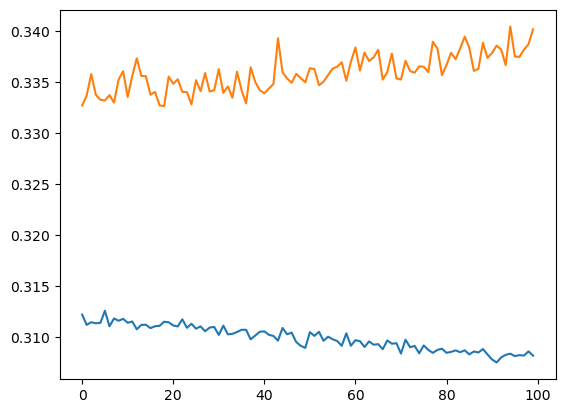

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

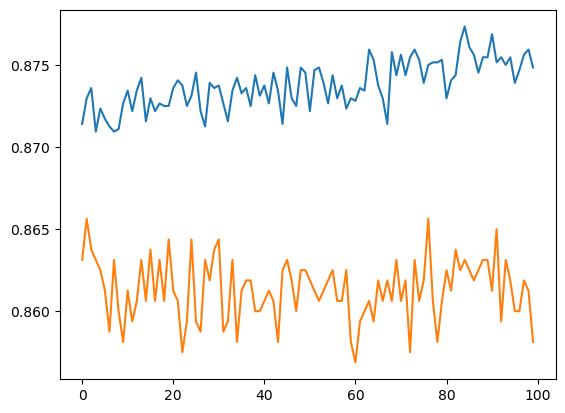

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])